# Problema:  Prever se um cliente vai cancelar sua assinatura

# Estrutura das variáveis


*   **Estado:** O estado de onde o cliente é originário
*   **Tempo de conta:** Número de dias que o cliente está usando os serviços
*   **Código de área:** A área de onde o cliente é originário
*   **Número de telefone:** O número de telefone do cliente
*   **Plano internacional:** O status do plano internacional do cliente
*   **Plano de correio de voz:** O status do plano de correio de voz do cliente
*   **Número de mensagens de correio de voz:** Número de mensagens de correio de voz enviadas pelo cliente
*   **Total de minutos diurnos:** Total de minutos de chamadas feitos por um cliente durante o dia
*   **Total de chamadas diurnas:** Número total de chamadas feitas por um cliente durante o dia
*   **Total de cobranças diurnas:** Valor total cobrado a um cliente **durante** o dia
*   **Total de minutos vespertinos:** Total de minutos de chamadas feitos por um cliente durante a tarde
*   **Total de chamadas vespertinas:** Número total de chamadas feitas por um cliente durante a tarde
*   **Total de cobranças vespertinas:** Valor total cobrado a um cliente durante a tarde
*   **Total de minutos noturnos:** Total de minutos de chamadas feitos por um cliente durante a noite
*   **Total de chamadas noturnas:** Número total de chamadas feitas por um cliente durante a noite
*   **Total de cobranças noturnas:** Valor total cobrado a um cliente durante a noite
*   **Total de minutos internacionais:** Total de minutos de chamadas internacionais feitas por um cliente
*   **Total de chamadas internacionais:** Número total de chamadas internacionais feitas por um cliente
*   **Total de cobranças internacionais:** Valor total cobrado por chamadas internacionais feitas por um cliente
*   **Chamadas ao serviço de atendimento ao cliente:** Número total de chamadas feitas ao serviço de atendimento ao cliente
*   **Cancelamento:** Cancelado ou não

https://github.com/kuldeep1909/Sony-Research-Machine-Learning-Project

In [41]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn
#!pip install jupyter
%pip install shap
%pip install torchmetrics

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchmetrics
from torch.utils.data import TensorDataset, DataLoader

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from imblearn.over_sampling import ADASYN

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import set_config
set_config(display='diagram')

import warnings
warnings.filterwarnings('ignore')


In [43]:
url = 'Sony_data.csv'
df = pd.read_csv(url)
df.head()

,Estado,Tempo_conta,Codigo_area,Numero_telefone,Plano_internacional,Plano_correio,Numero_mensagens_voz,Total_minutos_diurnos,Total_chamadas_diurnas,Total_cobrancas_diurnas,...,Total_chamadas_vespertinas,Total_cobrancas_vespertinas,Total_minutos_noturnos,Total_chamadas_noturnas,Total_cobrancas_noturnas,Total_minutos_internacionais,Total_chamadas_internacionais,Total_cobrancas_internacionais,Chamadas_atendimento,Cancelamento
0,KS,128,415,382-4657,nao,sim,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,nao,sim,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,nao,nao,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,sim,nao,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,sim,nao,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Análise Exploratória dos Dados (EDA)

#### Atributo shape

O atributo **shape** em um DataFrame do pandas retorna uma tupla com o **número de linhas e colunas** do DataFrame, ou seja, a dimensão do DataFrame. O primeiro valor da tupla indica o número de linhas e o segundo valor indica o número de colunas.

In [44]:
# Análise dos registros e features
df.shape

(3333, 21)

#### Método info()

O método **info()** no pandas exibe um **resumo conciso** sobre o DataFrame. Esse método é útil para obter uma visão geral da estrutura do DataFrame, especialmente para **verificar rapidamente quais colunas têm valores nulos e quais tipos de dados** estão presentes.

Ele fornece as seguintes informações:

*   Número total de entradas (linhas) no DataFrame.
*   Nome das colunas do DataFrame.
*   Número total de valores não nulos para cada coluna.
*   Tipo de dado (dtype) de cada coluna, como int64, float64, object, etc.
*   Uso de memória do DataFrame.

In [45]:
# Análise dos tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Estado                          3333 non-null   object 
 1   Tempo_conta                     3333 non-null   int64  
 2   Codigo_area                     3333 non-null   int64  
 3   Numero_telefone                 3333 non-null   object 
 4   Plano_internacional             3333 non-null   object 
 5   Plano_correio                   3333 non-null   object 
 6   Numero_mensagens_voz            3333 non-null   int64  
 7   Total_minutos_diurnos           3333 non-null   float64
 8   Total_chamadas_diurnas          3333 non-null   int64  
 9   Total_cobrancas_diurnas         3333 non-null   float64
 10  Total_minutos_vespertinos       3333 non-null   float64
 11  Total_chamadas_vespertinas      3333 non-null   int64  
 12  Total_cobrancas_vespertinas     33

#### Comando isna().sum()

O comando **isna().sum()** no pandas é utilizado para verificar a quantidade de valores nulos (ou ausentes) em cada coluna de um DataFrame.

* isna(): cria um DataFrame booleano, onde cada célula indica True se o valor for nulo (NaN), ou False se o valor não for nulo.
* sum(): Ao aplicar o sum() após isna(), ele conta o número de valores True (ou seja, valores nulos) em cada coluna.  O **resultado será uma série (Series)** que mostra o nome de cada coluna e o número de valores nulos correspondentes.
* reset_index(): Converte a série resultante em um DataFrame. O índice original (nomes das colunas) é transformado em uma coluna normal.
* rename(columns={...}): Renomeia as colunas do DataFrame resultante.

In [46]:
# Análise dos valores nulos
df.isna().sum().reset_index().rename(columns={'index': 'Features', 0:'Count'})

#A coluna index (o nome padrão criado pelo reset_index()) é renomeada
#para "Features", e a coluna com a contagem de nulos é renomeada para "Count"

,Features,Count
0,Estado,0
1,Tempo_conta,0
2,Codigo_area,0
3,Numero_telefone,0
4,Plano_internacional,0
5,Plano_correio,0
6,Numero_mensagens_voz,0
7,Total_minutos_diurnos,0
8,Total_chamadas_diurnas,0
9,Total_cobrancas_diurnas,0


#### <p style="color:blue;">Comando duplicated().sum()</p>

O comando **df.duplicated().sum()** no pandas é utilizado para **identificar e contar quantas linhas duplicadas existem** no DataFrame df.

* df.duplicated(): Retorna uma série booleana que indica, para cada linha do DataFrame, se ela é uma duplicata ou não. O valor será True se a linha for duplicada em relação a uma linha anterior e False se for única.
* sum(): Soma os valores True (que são interpretados como 1), retornando o número total de linhas duplicadas no DataFrame.

In [47]:
# Análise dos valores duplicados
df.duplicated().sum()

0

####  Comando df.describe

O comando describe() no pandas é utilizado para **gerar estatísticas descritivas resumidas** das colunas numéricas de um DataFrame.

* count: Número de valores não nulos em cada coluna.
* mean: A média dos valores em cada coluna.
* std: O desvio padrão dos valores em cada coluna, que mede a dispersão dos dados.
* min: O valor mínimo de cada coluna.
* 25%: O primeiro quartil (25º percentil), que representa o ponto em que 25% dos dados estão abaixo deste valor.
* 50% (mediana): O segundo quartil ou mediana (50º percentil), que representa o valor central.
* 75%: O terceiro quartil (75º percentil), que representa o ponto em que 75% dos dados estão abaixo deste valor.
* max: O valor máximo de cada coluna.

In [48]:
# Análise das medidas estatísticas (numéricas)
df.describe()

,Tempo_conta,Codigo_area,Numero_mensagens_voz,Total_minutos_diurnos,Total_chamadas_diurnas,Total_cobrancas_diurnas,Total_minutos_vespertinos,Total_chamadas_vespertinas,Total_cobrancas_vespertinas,Total_minutos_noturnos,Total_chamadas_noturnas,Total_cobrancas_noturnas,Total_minutos_internacionais,Total_chamadas_internacionais,Total_cobrancas_internacionais,Chamadas_atendimento
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


O comando describe(include='object') no pandas é usado para **gerar estatísticas descritivas** para as colunas que têm dados de tipo "objetos" (normalmente, colunas que contêm strings ou outros tipos categóricos).

Quando aplicado a colunas com strings ou dados categóricos, o describe() retorna as seguintes informações:

* count: O número de valores não nulos.
* unique: O número de valores únicos.
* top: O valor mais frequente (moda).
* freq: A frequência do valor mais frequente (quantas vezes ele aparece).

In [49]:
# Análise das medidas estatísticas (categóricas)
df.describe(include='object')

,Estado,Numero_telefone,Plano_internacional,Plano_correio
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,nao,nao
freq,106,1,3010,2411


#### Análise dos Outliers

Um outlier (ou valor aberrante) é um ponto de dado que se distancia significativamente dos outros valores de um conjunto de dados. Ele pode indicar uma variação incomum, erro de medição ou entrada incorreta. A Análise dos Outliers tem o objetivo de detectar outliers em colunas numéricas de um DataFrame.

Os Outliers são importantes porque:
* Indicadores de Problemas: Outliers podem apontar erros de entrada de dados, problemas de medição ou mudanças inesperadas no comportamento de um sistema.
* Influência nas Estatísticas: Outliers podem distorcer medidas como a média, desvio padrão e até afetar algoritmos de aprendizado de máquina, que são sensíveis a esses valores extremos.
* Análise de Casos Especiais: Em alguns casos, outliers podem ser fenômenos de interesse, como fraudes em sistemas financeiros ou eventos raros em estudos científicos.

Um dos método que pode ser utilizado é o médodo do Intervalo Interquartil (IQR).  O IQR é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1).

* Valores menores que Q1 - 1.5 * IQR são considerados outliers baixos.
* Valores maiores que Q3 + 1.5 * IQR são considerados outliers altos.

Outras formas de identificar os outliers:

* Método da Desvio Padrão: Qualquer valor que esteja a mais de 2 ou 3 desvios padrão da média poderia ser analisado com sendo um outlier.
* Visualizações: gerar Boxplots que mostram a distribuição dos dados e destacam valores fora do intervalo esperado como outliers. Gerar Histogramas que mostram a frequência de valores e podem evidenciar valores que estão distantes da maioria.

In [50]:
# Análise dos Outliers: Médodo do Intervalo Interquartil (IQR)
def detect_outliers_iqr(df):

    #outlier_count armazena o número de outliers para cada coluna
    outlier_count = {}
    outliers_values = pd.DataFrame()
    for column in df.select_dtypes(include='number'):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_values = pd.concat([outliers_values, outliers])
        outlier_count[column] = outliers.shape[0]
    return outlier_count, outliers_values.drop_duplicates()

outliers_count_df, outliers_values_df = detect_outliers_iqr(df)

In [51]:
outliers_count_df  = pd.DataFrame(list(outliers_count_df.items()), columns=['Variáveis', 'Número de Outliers'])
outliers_count_df

,Variáveis,Número de Outliers
0,Tempo_conta,18
1,Codigo_area,0
2,Numero_mensagens_voz,1
3,Total_minutos_diurnos,25
4,Total_chamadas_diurnas,23
5,Total_cobrancas_diurnas,25
6,Total_minutos_vespertinos,24
7,Total_chamadas_vespertinas,20
8,Total_cobrancas_vespertinas,24
9,Total_minutos_noturnos,30


In [52]:
variables_with_outliers = outliers_count_df['Variáveis'].tolist()
variables_with_outliers

['Tempo_conta',
 'Codigo_area',
 'Numero_mensagens_voz',
 'Total_minutos_diurnos',
 'Total_chamadas_diurnas',
 'Total_cobrancas_diurnas',
 'Total_minutos_vespertinos',
 'Total_chamadas_vespertinas',
 'Total_cobrancas_vespertinas',
 'Total_minutos_noturnos',
 'Total_chamadas_noturnas',
 'Total_cobrancas_noturnas',
 'Total_minutos_internacionais',
 'Total_chamadas_internacionais',
 'Total_cobrancas_internacionais',
 'Chamadas_atendimento']

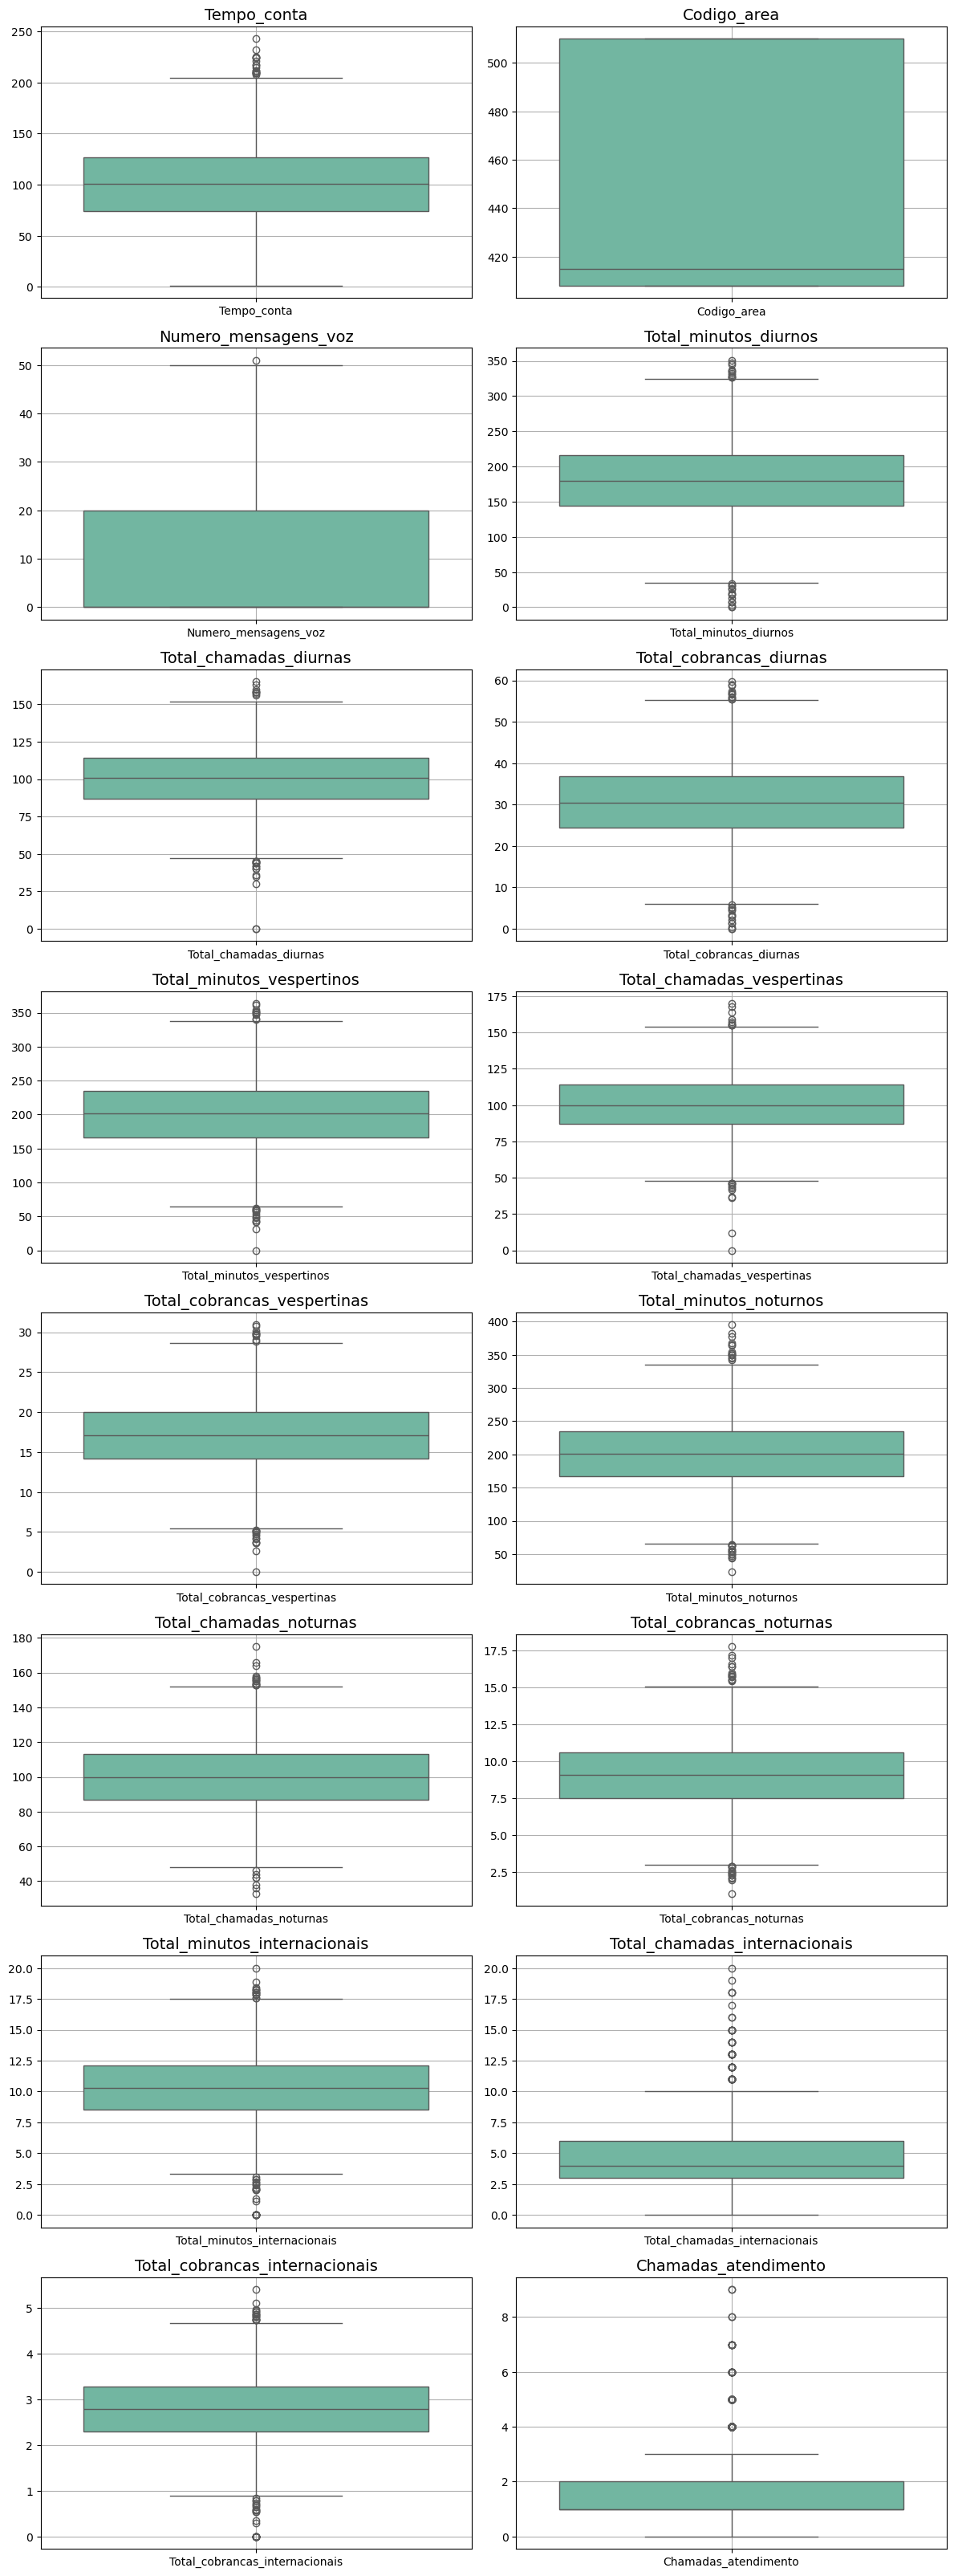

In [53]:
palette = sns.color_palette("Set2")
plt.figure(figsize=(12, len(variables_with_outliers) * 4))

for i, col in enumerate(variables_with_outliers):
    plt.subplot(len(variables_with_outliers), 2, i + 1)
    sns.boxplot(data=df[[col]], palette=palette)
    plt.title(f'{col}', fontsize=14)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [54]:
outliers_values_df

,Estado,Tempo_conta,Codigo_area,Numero_telefone,Plano_internacional,Plano_correio,Numero_mensagens_voz,Total_minutos_diurnos,Total_chamadas_diurnas,Total_cobrancas_diurnas,...,Total_chamadas_vespertinas,Total_cobrancas_vespertinas,Total_minutos_noturnos,Total_chamadas_noturnas,Total_cobrancas_noturnas,Total_minutos_internacionais,Total_chamadas_internacionais,Total_cobrancas_internacionais,Chamadas_atendimento,Cancelamento
197,TX,208,510,378-3625,nao,nao,0,326.5,67,55.51,...,113,14.99,181.7,102,8.18,10.7,6,2.89,2,True
238,WY,215,510,393-9619,nao,nao,0,83.6,148,14.21,...,91,10.28,226.6,110,10.20,10.7,9,2.89,0,False
309,SD,209,415,413-5310,nao,nao,0,227.2,128,38.62,...,92,21.96,183.5,74,8.26,8.9,4,2.40,3,False
416,DE,224,510,361-6563,sim,nao,0,171.5,99,29.16,...,103,13.60,212.4,102,9.56,5.0,2,1.35,1,True
817,UT,243,510,355-9360,nao,nao,0,95.5,92,16.24,...,63,13.91,264.2,118,11.89,6.6,6,1.78,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,IL,71,510,330-7137,sim,nao,0,186.1,114,31.64,...,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3309,VT,100,408,340-9449,sim,nao,0,219.4,112,37.30,...,102,19.18,255.3,95,11.49,12.0,4,3.24,4,False
3320,GA,122,510,411-5677,sim,nao,0,140.0,101,23.80,...,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,409-1856,nao,nao,0,321.1,105,54.59,...,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


#### Análise de classes desbalanceadas

A análise de classes desbalanceadas é o processo de examinar a distribuição das classes em um conjunto de dados, particularmente em problemas de classificação, para identificar se há uma disparidade significativa no número de exemplos entre as diferentes classes. Esse desbalanceamento pode impactar a performance de modelos de aprendizado de máquina e é um ponto crítico a ser abordado durante a fase de pré-processamento e modelagem de dados.


Em um problema de classificação, as "classes" são os diferentes rótulos que o modelo tenta prever. Uma análise simples de classes desbalanceadas, pode ser feita calculando a porcentagem de ocorrência de cada classe em uma coluna. Por exemplo, em um problema de detecção de fraudes, as classes podem ser "fraude" e "não fraude". Uma classe desbalanceada ocorre quando uma ou mais classes têm muito mais (ou muito menos) exemplos do que outras. Por exemplo, se 95% dos dados forem da classe "não fraude" e apenas 5% forem da classe "fraude", temos um cenário de desbalanceamento.


Classe desbalanceadas podem ter impacto na performance dos modelos de aprendizado de máquina que geralmente são treinados para minimizar um erro geral (como acurácia). Se os dados forem desbalanceados, o modelo pode aprender a ignorar as classes minoritárias, prevendo sempre a classe majoritária, o que pode resultar em um modelo que parece ser preciso, mas que na realidade não resolve o problema.

Métricas como acurácia podem ser enganosas em cenários desbalanceados. Um modelo pode parecer "preciso" porque acerta a maioria das previsões para a classe majoritária, enquanto falha completamente em identificar a classe minoritária.  Quando os dados são desbalanceados, métricas como F1-score, Precisão, Revocação (Recall) e AUC-ROC tornam-se mais adequadas para avaliação, em vez de acurácia. Essas métricas consideram o desempenho em relação à classe minoritária.

#### Comando value_counts()

Conta o número de ocorrências de cada valor na coluna. O argumento normalize=True faz com que o resultado seja a proporção (fração) de cada valor em relação ao total. O resultado é uma série (Series).

In [55]:
# Análise das classes desbalanceadas
class_balance = df['Cancelamento'].value_counts(normalize=True) * 100
class_balance

Cancelamento
False    85.508551
True     14.491449
Name: proportion, dtype: float64

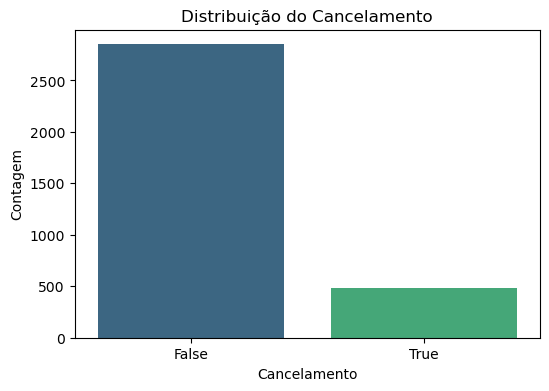

In [56]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Cancelamento', data=df, palette='viridis')
plt.title('Distribuição do Cancelamento')
plt.xlabel('Cancelamento')
plt.ylabel('Contagem')
plt.show()

#### Correlação

A análise de correlação é um método estatístico utilizado para medir e avaliar a relação entre duas ou mais variáveis. Ela permite identificar se, e em que grau, as variáveis estão relacionadas entre si, ou seja, se a mudança em uma variável está associada a mudanças em outra.

Tipos de Correlação:
* Correlação Positiva: Quando uma variável aumenta, a outra também tende a aumentar. Exemplo: À medida que a altura de uma pessoa aumenta, o peso também tende a aumentar.
* Correlação Negativa: Quando uma variável aumenta, a outra tende a diminuir. Exemplo: À medida que o preço de um produto aumenta, a demanda pode diminuir.
Correlação Nula (ou Ausente):
* Não há uma relação linear aparente entre as variáveis. Exemplo: A altura de uma pessoa e o número de livros que ela lê por ano provavelmente não estão relacionados.

Na fase de análise exploratória de dados (EDA), a correlação é útil para entender as relações entre diferentes variáveis no conjunto de dados.
Pode ajudar a identificar variáveis que são redundantes (altamente correlacionadas) e aquelas que podem ser mais úteis para previsão. Variáveis altamente correlacionadas podem conter informações redundantes, o que pode ser prejudicial em certos modelos, como a regressão linear. A correlação pode guiar a eliminação de variáveis correlacionadas para melhorar a performance do modelo.

Embora a correlação não implique causalidade, ela pode ser o primeiro passo para identificar relações que merecem investigação mais aprofundada. Por exemplo, se duas variáveis são altamente correlacionadas, pode ser interessante investigar se uma causa a outra, ou se há um terceiro fator envolvido.

Medidas de Correlação:

* **Correlação de Pearson** Medida mais comum para variáveis numéricas que têm uma relação linear. A correlação de Pearson, em particular, pode ser sensível a outliers, o que pode distorcer a percepção da relação entre as variáveis.Intervalo de valores: entre -1 e 1.

  * 1: Correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta de maneira proporcional).
  * 0: Nenhuma correlação linear.
  * -1: Correlação negativa perfeita (quando uma variável aumenta, a outra diminui de maneira proporcional).
* **Correlação de Spearman**: Usada para variáveis que não têm uma relação linear, mas sim uma relação monotônica (onde a ordem dos dados importa). Baseada no ranking das variáveis, sendo útil quando há valores atípicos ou dados não normalmente distribuídos.
* **Correlação de Kendall**: Outra medida baseada em ranking, mas usada para avaliar a força de associação entre duas variáveis ordinais.

#### Comando select_dtypes

Esse comando seleciona as colunas de um DataFrame com base nos seus tipos de dados.

In [57]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop('Estado')

#### Comando corr(method='pearson')

Calcula a matriz de correlação entre as variáveis numéricas usando o coeficiente de correlação de Pearson. O coeficiente de Pearson mede a relação linear entre duas variáveis, retornando um valor entre -1 e 1:

In [58]:
# Correlação de Pearson
pearson_correlation_matrix = df[numerical_features].corr(method='pearson')
pearson_correlation_matrix

,Tempo_conta,Codigo_area,Numero_mensagens_voz,Total_minutos_diurnos,Total_chamadas_diurnas,Total_cobrancas_diurnas,Total_minutos_vespertinos,Total_chamadas_vespertinas,Total_cobrancas_vespertinas,Total_minutos_noturnos,Total_chamadas_noturnas,Total_cobrancas_noturnas,Total_minutos_internacionais,Total_chamadas_internacionais,Total_cobrancas_internacionais,Chamadas_atendimento
Tempo_conta,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
Codigo_area,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
Numero_mensagens_voz,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
Total_minutos_diurnos,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
Total_chamadas_diurnas,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
Total_cobrancas_diurnas,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
Total_minutos_vespertinos,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
Total_chamadas_vespertinas,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
Total_cobrancas_vespertinas,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
Total_minutos_noturnos,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


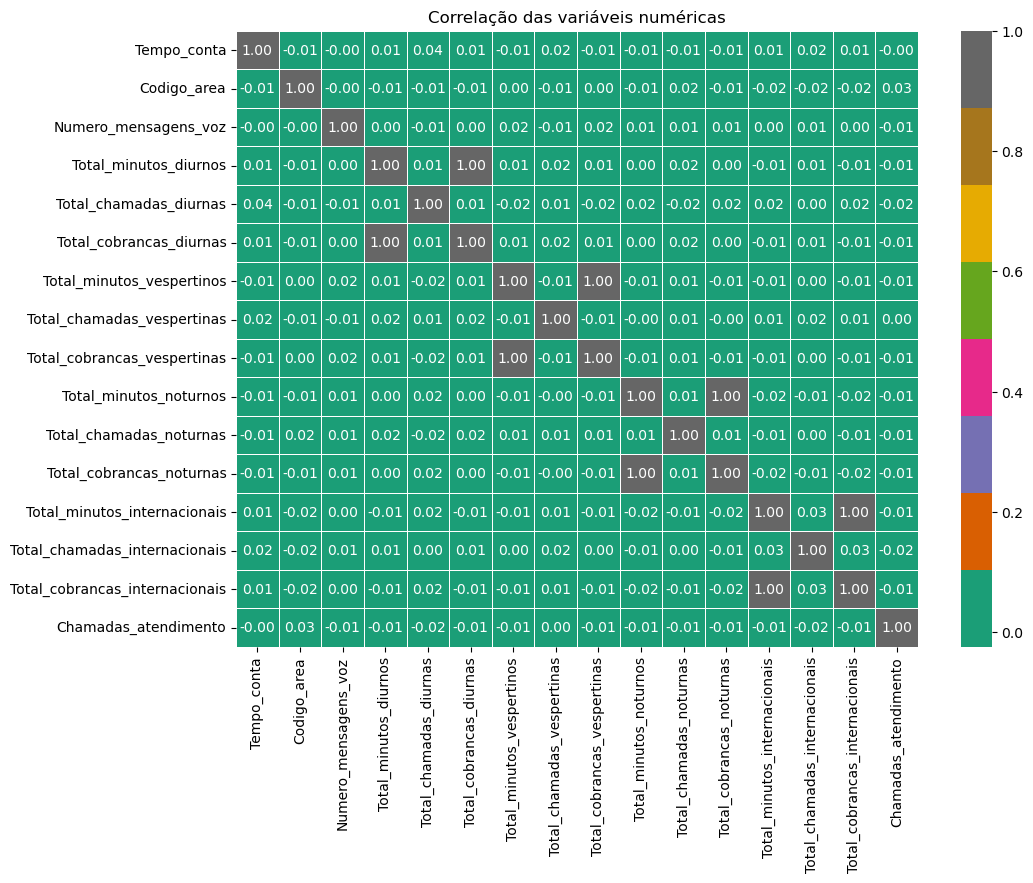

In [59]:
plt.figure(figsize=(11, 8))
sns.heatmap(pearson_correlation_matrix, annot=True, fmt=".2f",cmap='Dark2',linewidths=0.5)
plt.title('Correlação das variáveis numéricas')
plt.show()

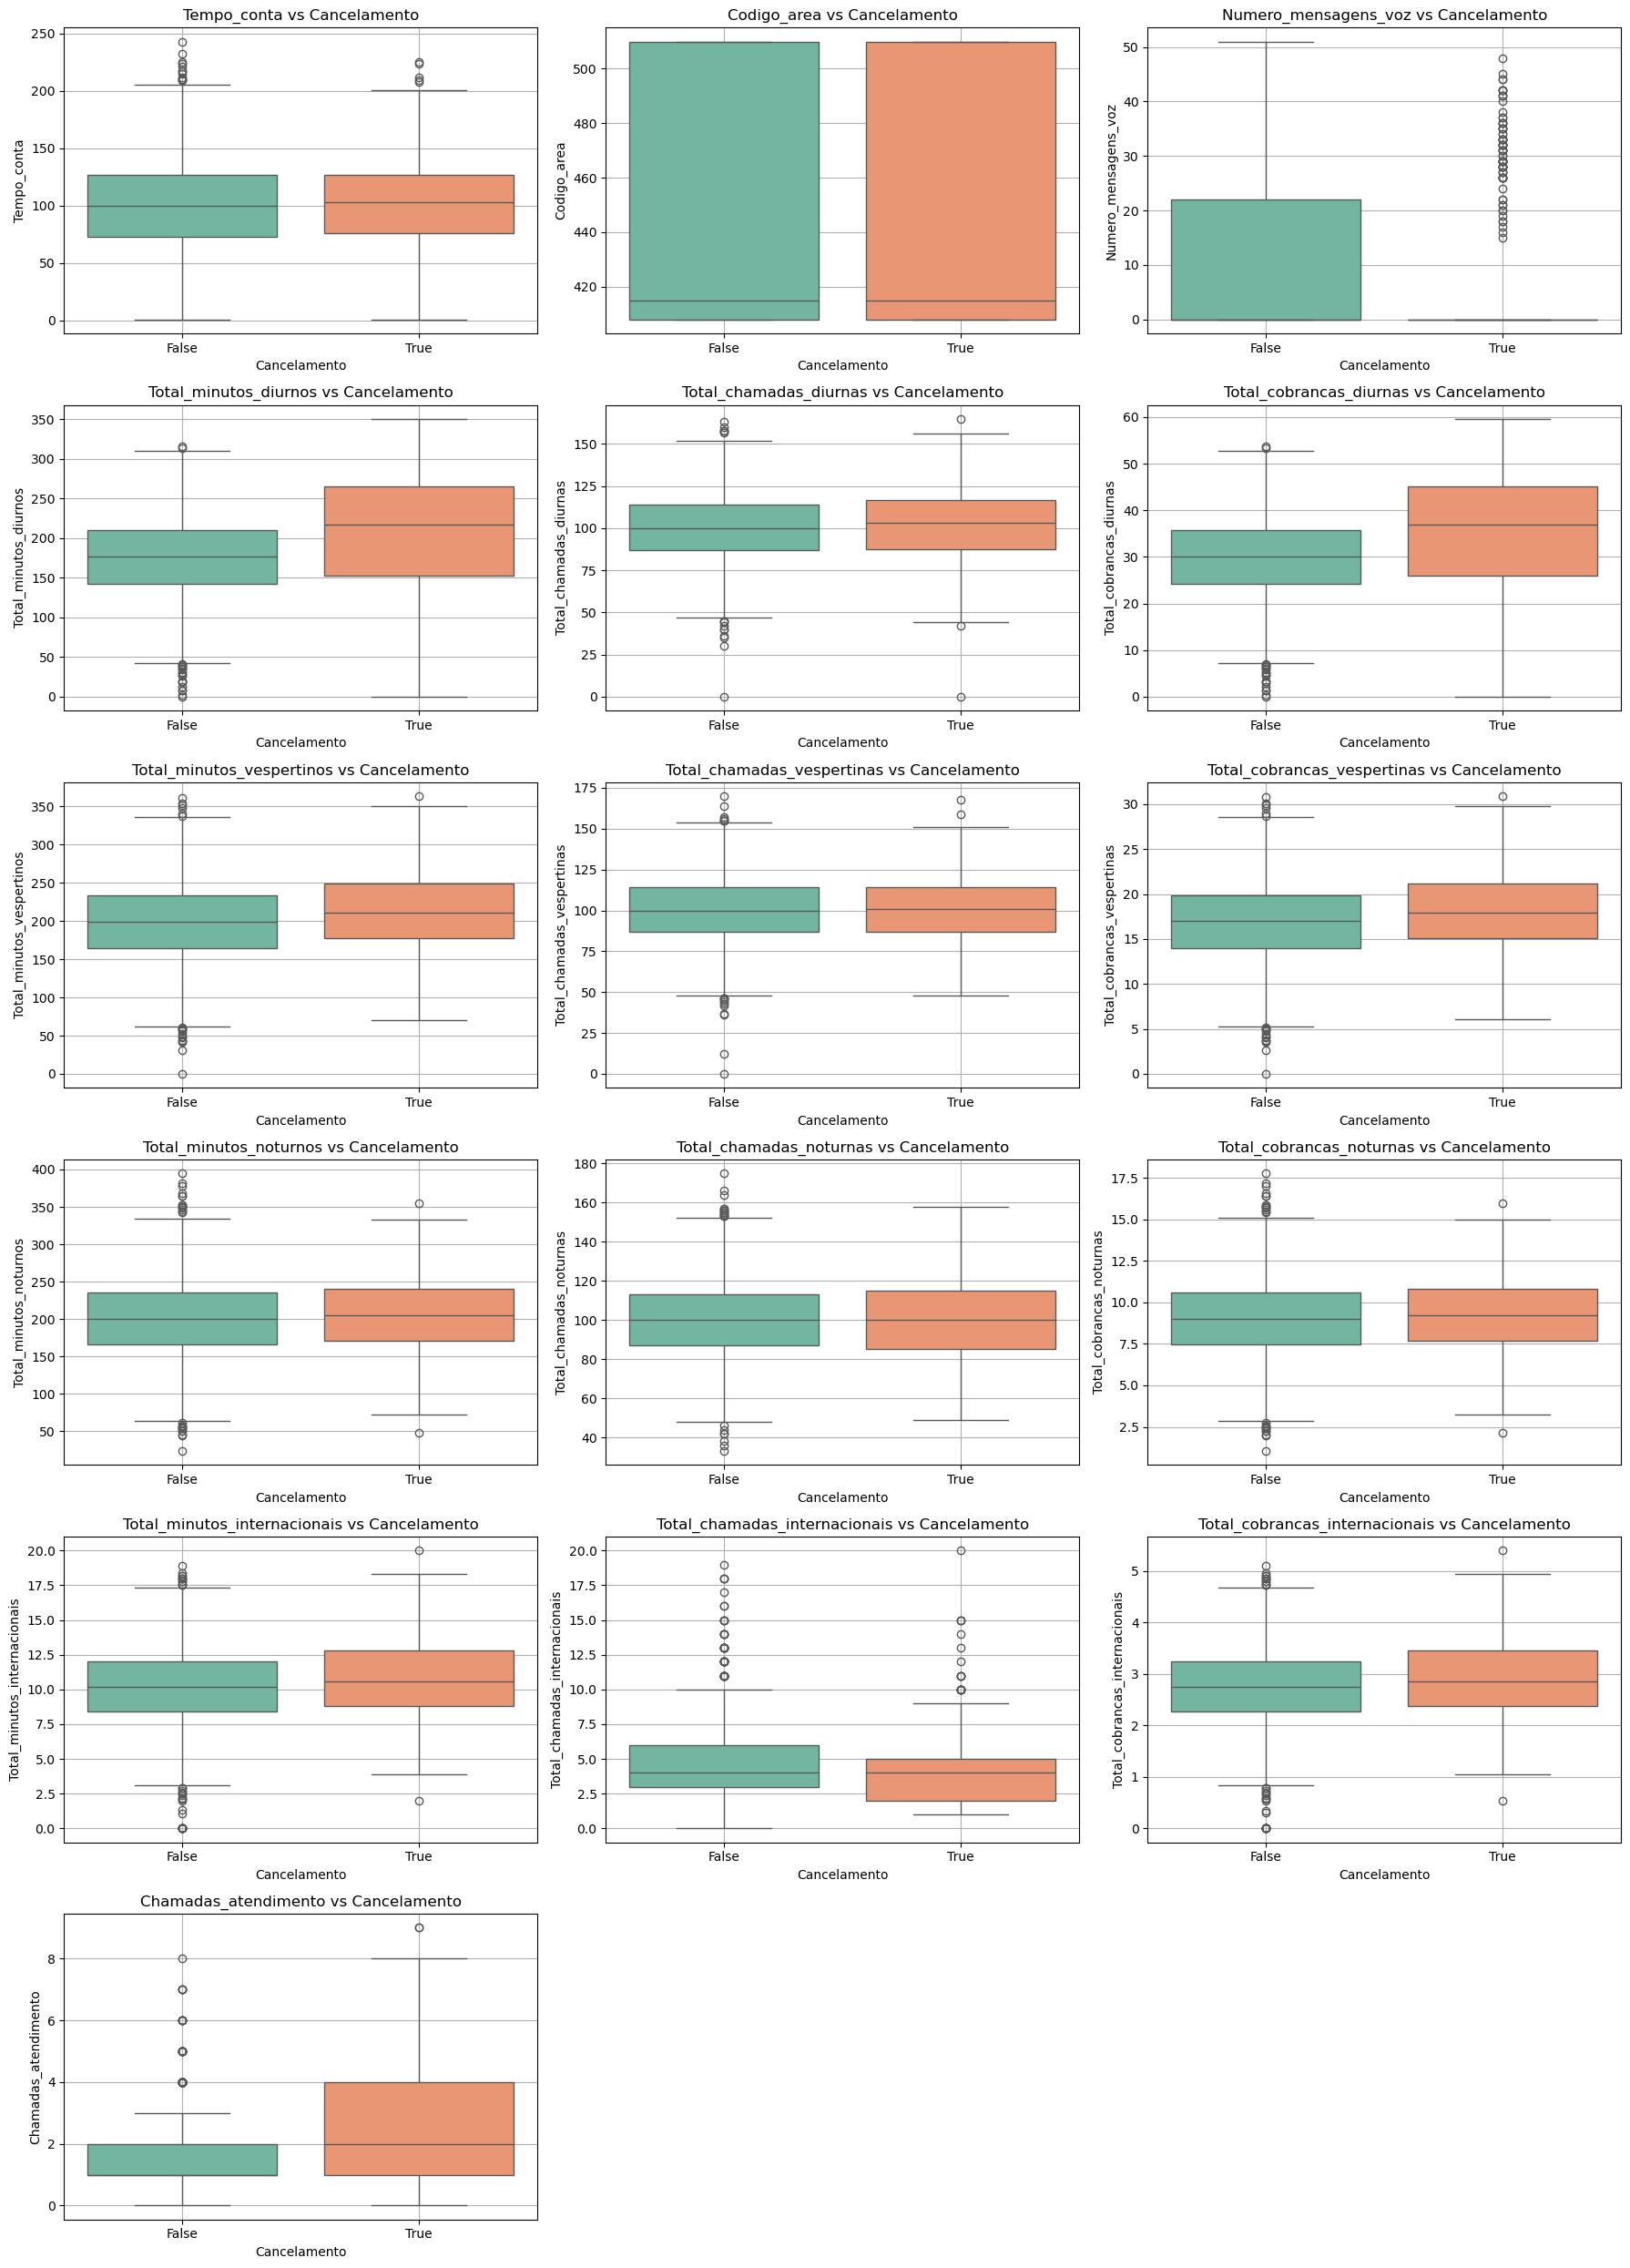

In [60]:
# Features numéricas vs Cancelamento
palette = sns.color_palette("Set2")
plt.figure(figsize=(18, 25))
for i, col in enumerate(numerical_features):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(x='Cancelamento', y=col, data=df, palette=palette)
    plt.title(f'{col} vs Cancelamento')
    plt.grid(True)

plt.tight_layout()
plt.show()
